In [55]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [56]:
data_folder = '/group/ag_compstatphys/data/tolga/simulation'

obstacle file: crystalline_walls_W15_rho0.8.h5

thermalization: slit_pore__equilibration_D15_rho0.7_T1.00_20251014_224116.h5

production: slit_pore__production_D15_rho0.7_T1.00_20251014_224829.h5


In [72]:
def sample_observables(file_name):

    file_path = f'{data_folder}/{file_name}'

    observables = {}
    num_regions = 0

    with h5py.File(file_path, 'r') as sim_data:
        region_list = list(sim_data['thermo'].keys())
        num_regions = len(region_list)

        # Calculate time averaged stress tensor
        tensor_sampling = np.zeros((num_regions,6))
        for i in range(1, num_regions):
            dataset_path = f'thermo/slab_{i}/stress_tensor/value'
            dataset = sim_data[dataset_path]
            for cur_data in dataset:            
                tensor_sampling[i] += cur_data[0:6]
        tensor_sampling = tensor_sampling/((len(dataset)))
        observables['slab_stress_tensor'] = tensor_sampling


        # Calculate time averaged density 
        density_sampling = np.zeros(num_regions)
        for i in range(1, num_regions):
            dataset_path = f'thermo/slab_{i}/density/value'
            cur_data = sim_data[dataset_path]
            cur_data = (np.array(cur_data))
            #print(cur_data)    
            density_sampling[i] += np.mean(cur_data)
        
        observables['slab_density'] = density_sampling

        # Calculate time averaged temperature 
        temperature_sampling = np.zeros(num_regions)
        for i in range(1, num_regions):
            dataset_path = f'thermo/slab_{i}/temperature/value'
            cur_data = sim_data[dataset_path]
            cur_data = (np.array(cur_data))
            #print(cur_data)    
            temperature_sampling[i] += np.mean(cur_data)
        observables['temperature'] = temperature_sampling

        # Calculate time averaged particle_number 
        particle_number_sampling = np.zeros(num_regions)
        for i in range(1, num_regions):
            dataset_path = f'thermo/slab_{i}/particle_number/value'
            cur_data = sim_data[dataset_path]
            cur_data = (np.array(cur_data))
            #print(cur_data)    
            particle_number_sampling[i] += np.mean(cur_data)
        
        observables['particle_number'] = particle_number_sampling

        stress_tensor = sim_data['observables/stress_tensor/value']
        stress_tensor = np.array(stress_tensor)
        observables['stress_tensor'] = np.mean(stress_tensor, axis = 0)    

        pressure = sim_data['observables/pressure/value']
        pressure = np.array(pressure)
        observables['pressure'] = np.mean(pressure)   

        return observables

In [117]:
observables = sample_observables("slit_pore__production_D15_rho0.8_T1.00_20251015_153957.h5")

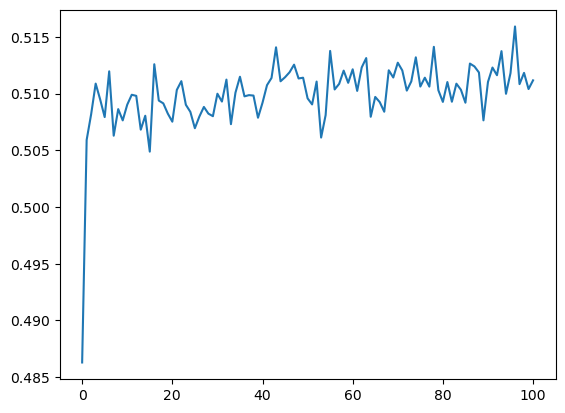

In [116]:
file_path = f'{data_folder}/{"slit_pore__production_D15_rho0.8_T1.00_20251015_153957.h5"}'
with h5py.File(file_path, 'r') as sim_data:
    potential_energy = np.array(sim_data['observables/potential_energy/value'])
    plt.plot(potential_energy)

Density profile obtained from individual slabs

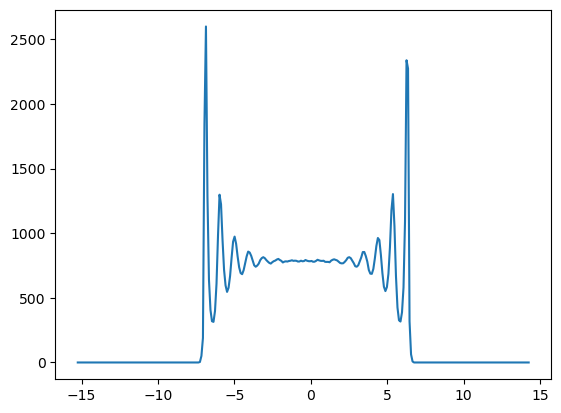

In [119]:
y = observables["particle_number"]
x = np.linspace(-15, 14.5 , len(y)) - 0.25

plt.plot(x,y,)

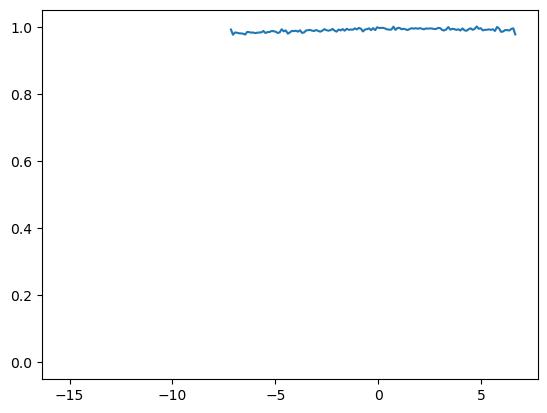

In [120]:
y = observables["temperature"]
x = np.linspace(-15, 14.5 , len(y)) - 0.25

plt.plot(x,y,)

In [59]:
y = observables['slab_density']

In [60]:
np.linspace(-15, 14.5 , y.shape[0]) + 0.25

array([-14.75, -14.25, -13.75, -13.25, -12.75, -12.25, -11.75, -11.25,
       -10.75, -10.25,  -9.75,  -9.25,  -8.75,  -8.25,  -7.75,  -7.25,
        -6.75,  -6.25,  -5.75,  -5.25,  -4.75,  -4.25,  -3.75,  -3.25,
        -2.75,  -2.25,  -1.75,  -1.25,  -0.75,  -0.25,   0.25,   0.75,
         1.25,   1.75,   2.25,   2.75,   3.25,   3.75,   4.25,   4.75,
         5.25,   5.75,   6.25,   6.75,   7.25,   7.75,   8.25,   8.75,
         9.25,   9.75,  10.25,  10.75,  11.25,  11.75,  12.25,  12.75,
        13.25,  13.75,  14.25,  14.75])

In [29]:
x

array([-14.5       , -14.00847458, -13.51694915, -13.02542373,
       -12.53389831, -12.04237288, -11.55084746, -11.05932203,
       -10.56779661, -10.07627119,  -9.58474576,  -9.09322034,
        -8.60169492,  -8.11016949,  -7.61864407,  -7.12711864,
        -6.63559322,  -6.1440678 ,  -5.65254237,  -5.16101695,
        -4.66949153,  -4.1779661 ,  -3.68644068,  -3.19491525,
        -2.70338983,  -2.21186441,  -1.72033898,  -1.22881356,
        -0.73728814,  -0.24576271,   0.24576271,   0.73728814,
         1.22881356,   1.72033898,   2.21186441,   2.70338983,
         3.19491525,   3.68644068,   4.1779661 ,   4.66949153,
         5.16101695,   5.65254237,   6.1440678 ,   6.63559322,
         7.12711864,   7.61864407,   8.11016949,   8.60169492,
         9.09322034,   9.58474576,  10.07627119,  10.56779661,
        11.05932203,  11.55084746,  12.04237288,  12.53389831,
        13.02542373,  13.51694915,  14.00847458,  14.5       ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


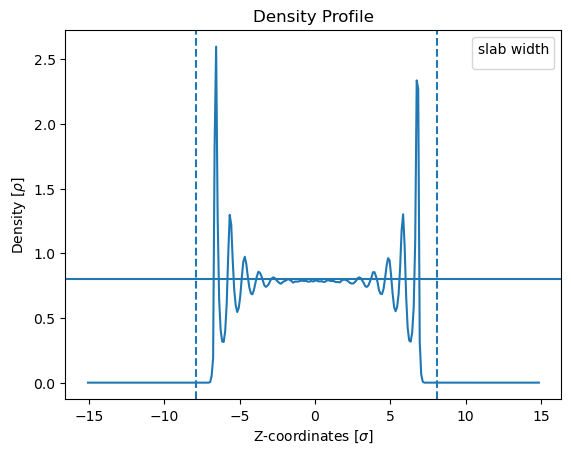

In [121]:

y = observables['slab_density']
x = np.linspace(-15, 14.9 , y.shape[0]) - 0.05

plt.plot(x,y,)
    

plt.axvline(-7.857, ls = '--')
plt.axvline(8.109, ls = '--')
plt.axhline(0.8)

plt.title("Density Profile")
plt.xlabel(r'Z-coordinates $[\sigma]$')
plt.ylabel(r"Density $[\rho]$")


plt.legend(title = 'slab width')
plt.show()


non-normalized local surface density

$$ \gamma^* = \sigma_\parallel - \sigma_\perp  $$
$$ \gamma^* = \frac{1}{2} (\sigma_{xx} + \sigma_{yy}) - \sigma_{zz} 

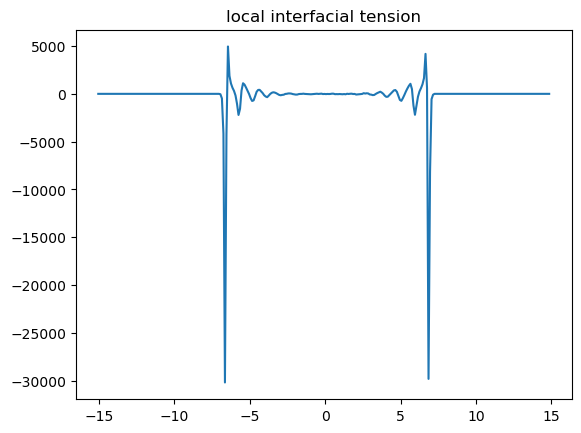

In [122]:
s = []
for i in range(3):
    s.append(observables["slab_stress_tensor"][:,i])

lst = 0.5*(s[0] + s[1]) - s[2]

plt.title("local interfacial tension")
plt.plot(x, lst)

In [123]:
area = 100*100
surface_tension = 0.5 * np.sum(lst)/area
print(f'surface tension per interface: {surface_tension:.3f}') 

surface tension per interface: -3.404


In [105]:
def read_wavevectors(file_name):

    file_path = f'{data_folder}/{file_name}'

    with h5py.File(file_path, 'r') as sim_data:

        # Read wavevectors
        wavenumber_slab_parallel = np.array(sim_data['ssf/slab_1/parallel/wavenumber']).tolist()
        wavenumber_slab_perpendicular = np.array(sim_data['ssf/slab_1/perpendicular/wavenumber']).tolist()

        wavenumber_global_parallel = np.array(sim_data['ssf/global_parallel/bulk/wavenumber']).tolist()
        wavenumber_global_perpendicular = np.array(sim_data['ssf/global_perpendicular/bulk/wavenumber']).tolist()

    return [wavenumber_slab_parallel, wavenumber_slab_perpendicular], [wavenumber_global_parallel, wavenumber_global_perpendicular]



def read_ssf(file_name):

    file_path = f'{data_folder}/{file_name}'
    num_regions = 0

    wavenumber_slab, wavenumber_global = read_wavevectors(file_name)


    with h5py.File(file_path, 'r') as sim_data:
        region_list = list(sim_data['ssf'].keys())
        num_regions = len(region_list)


        # Calculate time averaged static structure factor
        ssf_parallel = np.zeros((num_regions, len(wavenumber_slab[0]), 3))
        ssf_perpendicular = np.zeros((num_regions, len(wavenumber_slab[1]), 3))

        for i in range(1, num_regions - 1):
            dataset_parallel_path = f'ssf/slab_{i}/parallel/value'
            dataset_perpendicular_path = f'ssf/slab_{i}/perpendicular/value'

            ssf_parallel_cur = np.array(sim_data[dataset_parallel_path])
            ssf_perpendicular_cur = np.array(sim_data[dataset_perpendicular_path])

            ssf_parallel[i] = np.average(ssf_parallel_cur, axis = 0)
            ssf_perpendicular[i] = np.average(ssf_perpendicular_cur, axis = 0)



        # Calculate time averaged static structure along simulation box
        ssf_parallel_global = np.zeros((len(wavenumber_global[0]), 3))
        ssf_perpendicular_global = np.zeros((len(wavenumber_global[1]), 3))

        dataset_path = f'ssf/global_parallel/bulk/value'
        dataset = sim_data[dataset_path]
        ssf_parallel_global = np.average(np.array(dataset), axis = 0)

        dataset_path = f'ssf/global_perpendicular/bulk/value'
        dataset = sim_data[dataset_path]
        ssf_perpendicular_global = np.average(np.array(dataset), axis = 0)
        

        return ssf_parallel, ssf_perpendicular, ssf_parallel_global, ssf_perpendicular_global
    


In [124]:
file_name = "slit_pore__production_D15_rho0.8_T1.00_20251015_153957.h5"

In [125]:
ssf_parallel, ssf_perpendicular, ssf_parallel_global, ssf_perpendicular_global = read_ssf(file_name)
wavenumber_slab, wavenumber_global = read_wavevectors(file_name)

In [126]:
ssf_parallel_global.shape

(238, 3)

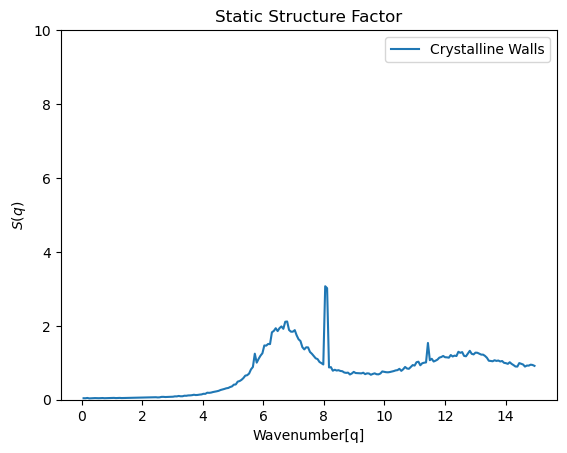

In [127]:

x = wavenumber_global[0]
y = ssf_parallel_global[:, 0]


plt.plot(x, y, label = "Crystalline Walls")

plt.ylim((0,10))

plt.title("Static Structure Factor")
plt.ylabel(r"$S(q)$")
plt.xlabel(r"Wavenumber[q]")
#plt.xscale("log")
plt.legend()
plt.show()

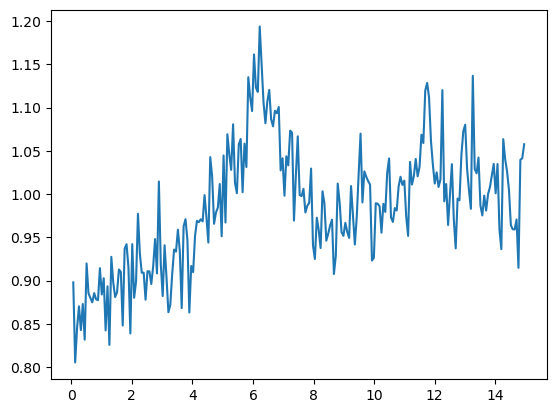

In [128]:
x = wavenumber_slab[0]
y = ssf_parallel[150,:,0] #middle slab

#plt.xscale('log')
plt.plot(x, y)

In [25]:


file_path = f'{data_folder}/{file_name}'
num_regions = 0

particle_num_list = []

with h5py.File(file_path, 'r') as sim_data:
    region_list = list(sim_data['thermo'].keys())
    num_regions = len(region_list)

    for i in range(1, num_regions - 1):
        db_path = f'thermo/slab_{i}/particle_number/value'
        particle_num_list.append(np.average(sim_data[db_path], axis=0))


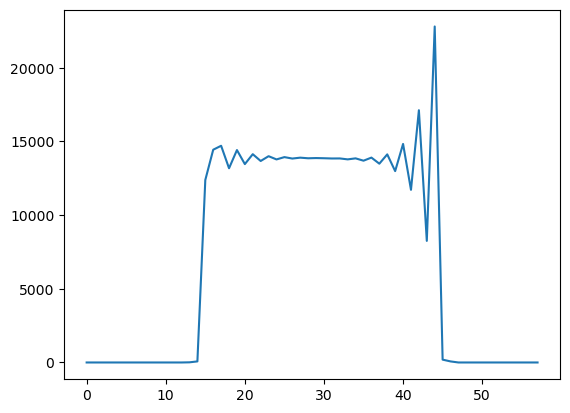

In [27]:
plt.plot(particle_num_list)

In [28]:
"[17-08-2025 18:32:34.306328] region (region-z13): lowest corner: -50 -50 -7.14"
"[17-08-2025 18:32:34.306336] region (region-z13): edge length: 100 100 0.113333"


with h5py.File(f'{data_folder}/{file_name}', 'r') as f:
    pos_fluid = f['/particles/fluid/position/value'][0]
    pos_obst = f['/particles/obstacles/position/value'][0]



species_fluid = ['F'] * pos_fluid.shape[0]
species_obst = ['O'] * pos_obst.shape[0]


all_positions = np.vstack((pos_fluid, pos_obst))
all_species = species_fluid + species_obst
n_atoms = all_positions.shape[0]

pos_list = np.empty(3)

for atom, pos in zip(all_species, all_positions):
    if atom == "F" and pos[2] > -7.14  and pos[2] < -7.02667:
        pos_list = np.vstack((pos_list, pos))



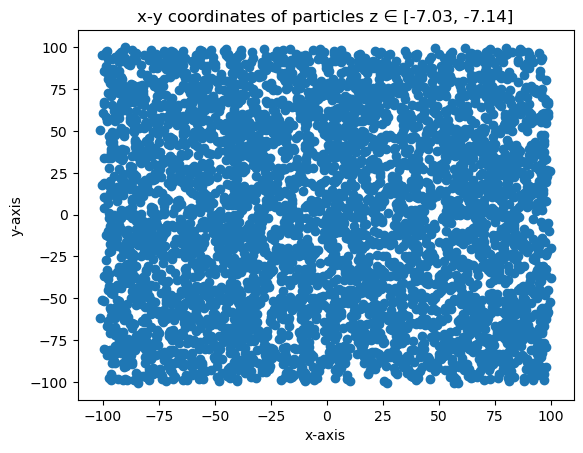

In [29]:
plt.scatter(pos_list[:,0], pos_list[:,1])

plt.xlabel("x-axis")
plt.ylabel("y-axis")


plt.title("x-y coordinates of particles z ∈ [-7.03, -7.14]")

plt.show()

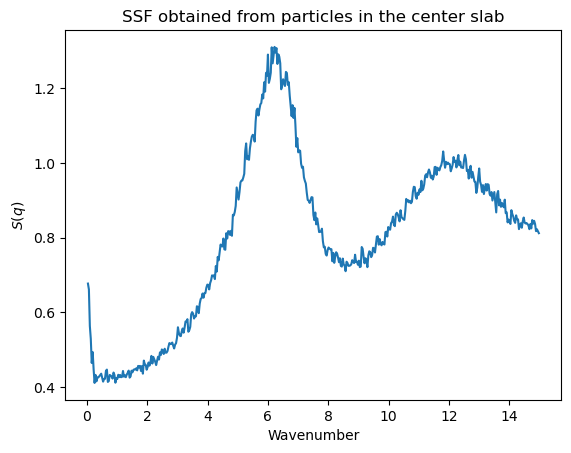

In [32]:
x = wavenumber_slab[0]
y = ssf_parallel[30,:,0] #middle slab

plt.title("SSF obtained from particles in the center slab")
plt.ylabel(r"$S(q)$")
plt.xlabel(r"Wavenumber")


#plt.xscale('log')
plt.plot(x, y)
plt.show()

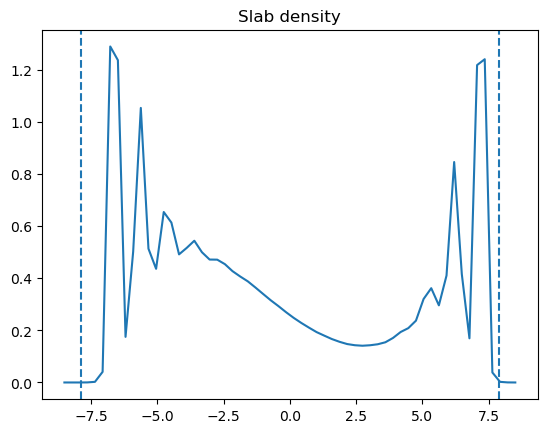

In [24]:
obs = sample_observables("slit_025_lp.h5")

y = obs['slab_density']
x = np.linspace(-8.5, 8.5, y.shape[0])

plt.axvline(-7.88, ls = '--')
plt.axvline(7.88, ls = '--')

plt.title("Slab density")

plt.plot(x,y)


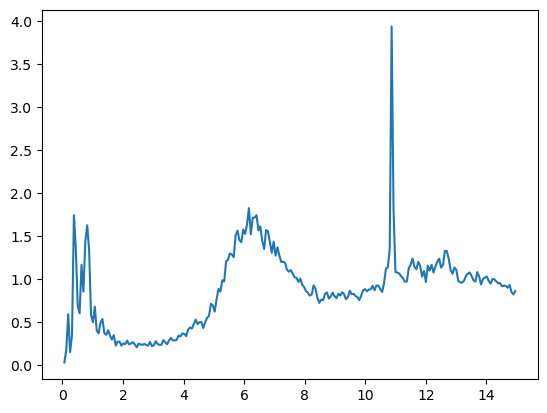

In [25]:
ssf_parallel, ssf_perpendicular, ssf_parallel_global, ssf_perpendicular_global = read_ssf("slit_025_lp2.h5")
wavenumber_slab, wavenumber_global = read_wavevectors("slit_025_lp2.h5")

plt.plot(wavenumber_global[0], ssf_parallel_global[:,0])
#plt.xscale("log")
plt.show()

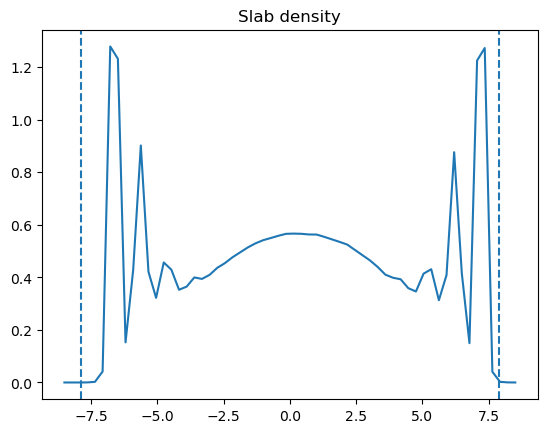

In [26]:
obs = sample_observables("slit_025_lp2.h5")

y = obs['slab_density']
x = np.linspace(-8.5, 8.5, y.shape[0])

plt.axvline(-7.88, ls = '--')
plt.axvline(7.88, ls = '--')

plt.title("Slab density")

plt.plot(x,y)


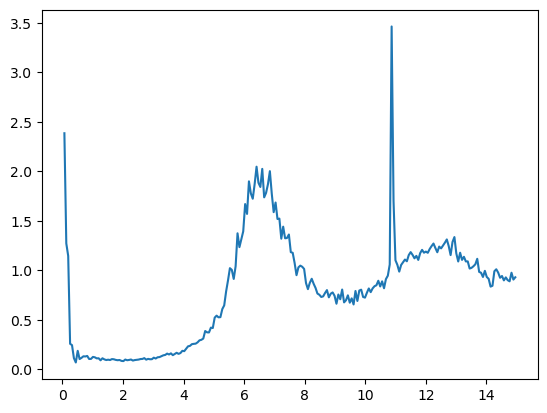

In [27]:
ssf_parallel, ssf_perpendicular, ssf_parallel_global, ssf_perpendicular_global = read_ssf("slit_025_lp3.h5")
wavenumber_slab, wavenumber_global = read_wavevectors("slit_025_lp3.h5")

plt.plot(wavenumber_global[0], ssf_parallel_global[:,0])
#plt.xscale("log")
plt.show()

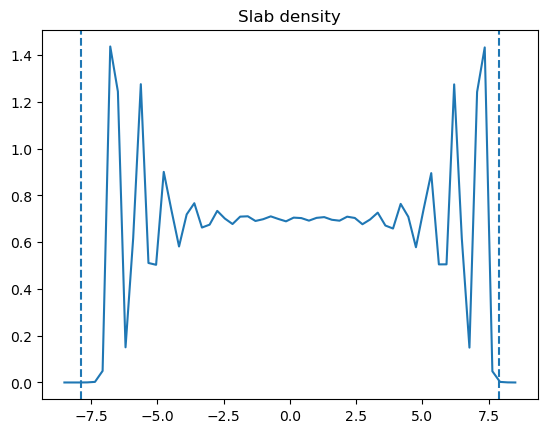

In [28]:
obs = sample_observables("slit_025_lp3.h5")

y = obs['slab_density']
x = np.linspace(-8.5, 8.5, y.shape[0])

plt.axvline(-7.88, ls = '--')
plt.axvline(7.88, ls = '--')

plt.title("Slab density")

plt.plot(x,y)


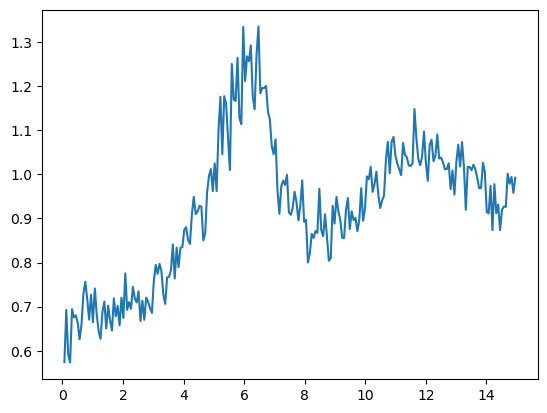

In [29]:
x = wavenumber_slab[0]
y = ssf_parallel[30,:,0] #middle slab

#plt.xscale('log')
plt.plot(x, y)

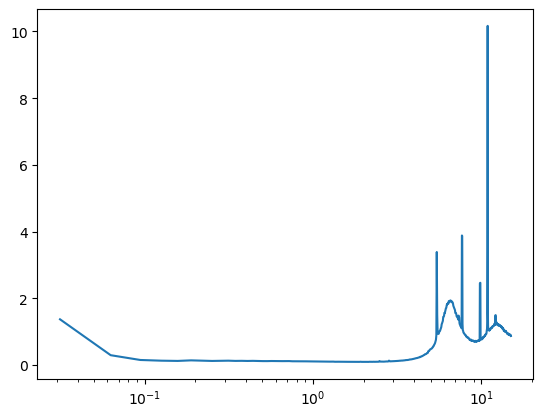

In [32]:
ssf_parallel, ssf_perpendicular, ssf_parallel_global, ssf_perpendicular_global = read_ssf("slit_1s_NVE.h5")
wavenumber_slab, wavenumber_global = read_wavevectors("slit_1s_NVE.h5")

plt.plot(wavenumber_global[0], ssf_parallel_global[:,0])
plt.xscale("log")
plt.show()

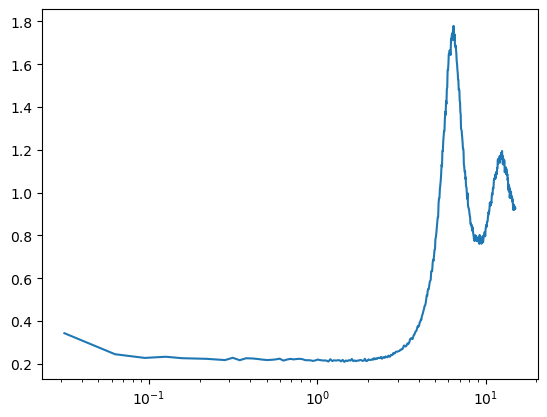

In [34]:
x = wavenumber_slab[0]
y = ssf_parallel[6,:,0] #middle slab

plt.xscale('log')
plt.plot(x, y)

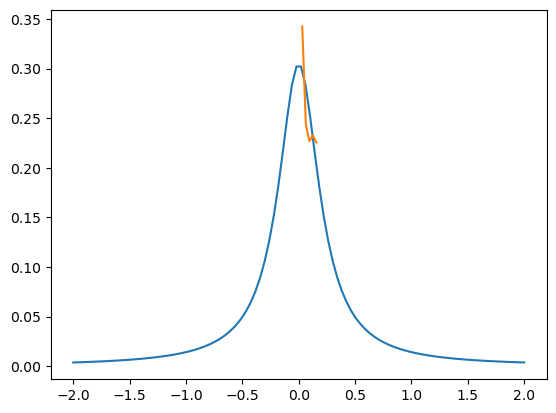

In [38]:
from scipy.optimize import curve_fit

x = x[:10]
y = y[:10]

popt, pcov = curve_fit(lorentzian, x, y)

xx = np.linspace(-2, 2, 100)
plt.plot(xx, lorentzian(xx, popt[0], popt[1]))
plt.plot(x, y)


In [31]:
obs = sample_observables("slit_1s.h5")

y = obs['slab_density']
x = np.linspace(-8.5, 8.5, y.shape[0])

plt.axvline(-7.88, ls = '--')
plt.axvline(7.88, ls = '--')

plt.title("Slab density")

plt.plot(x,y)


BlockingIOError: [Errno 11] Unable to open file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable')

In [ ]:



slit_1s_NVE.h5

In [43]:
ssf_parallel_NVE, ssf_perpendicular_NVE, ssf_parallel_global_NVE, ssf_perpendicular_global_NVE = read_ssf("slit_1s_NVE.h5")
wavenumber_slab_NVE, wavenumber_global_NVE = read_wavevectors("slit_1s_NVE.h5")


ssf_parallel_NVT, ssf_perpendicular_NVT, ssf_parallel_global_NVT, ssf_perpendicular_global_NVT = read_ssf("slit_1s.h5")
wavenumber_slab_NVT, wavenumber_global_NVT = read_wavevectors("slit_1s.h5")


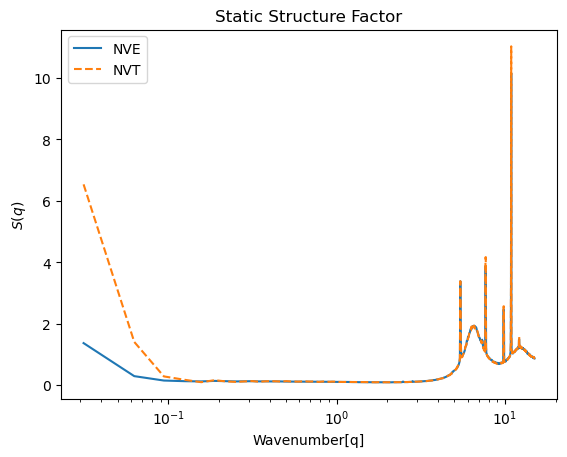

In [47]:
plt.plot(wavenumber_global_NVE[0], ssf_parallel_global_NVE[:,0], label = "NVE")

plt.plot(wavenumber_global_NVT[0], ssf_parallel_global_NVT[:,0], label = "NVT", ls = '--')

plt.title("Static Structure Factor")
plt.ylabel(r"$S(q)$")
plt.xlabel(r"Wavenumber[q]")
plt.xscale("log")
plt.legend()
plt.show()

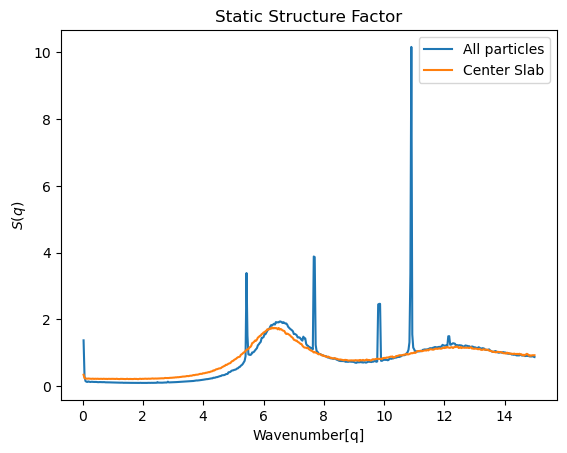

In [51]:
plt.plot(wavenumber_global_NVE[0], ssf_parallel_global_NVE[:,0], label = "All particles")

x = wavenumber_slab_NVE[0]
y = ssf_parallel_NVE[7,:,0] #middle slab

plt.plot(x, y, label = 'Center Slab')

plt.title("Static Structure Factor")
plt.ylabel(r"$S(q)$")
plt.xlabel(r"Wavenumber[q]")
#plt.xscale("log")
plt.legend()
plt.show()